In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.linear_model import LogisticRegression,LinearRegression

import warnings
warnings.filterwarnings("ignore")


In [103]:
df=pd.read_csv("./gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [104]:
df.shape


(847, 2)

In [105]:
print(f"Date range of gold prices available from- {df.iloc[0,0]} to {df.iloc[-1,0]}")

Date range of gold prices available from- 1950-01 to 2020-07


In [106]:
date=pd.date_range(start="1/1/1950",end="8/1/2020",freq="M")#month/day/year,frequency is month wise
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [107]:
df["month"]=date
df.drop("Date",axis=1,inplace=True)
df=df.set_index("month")
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


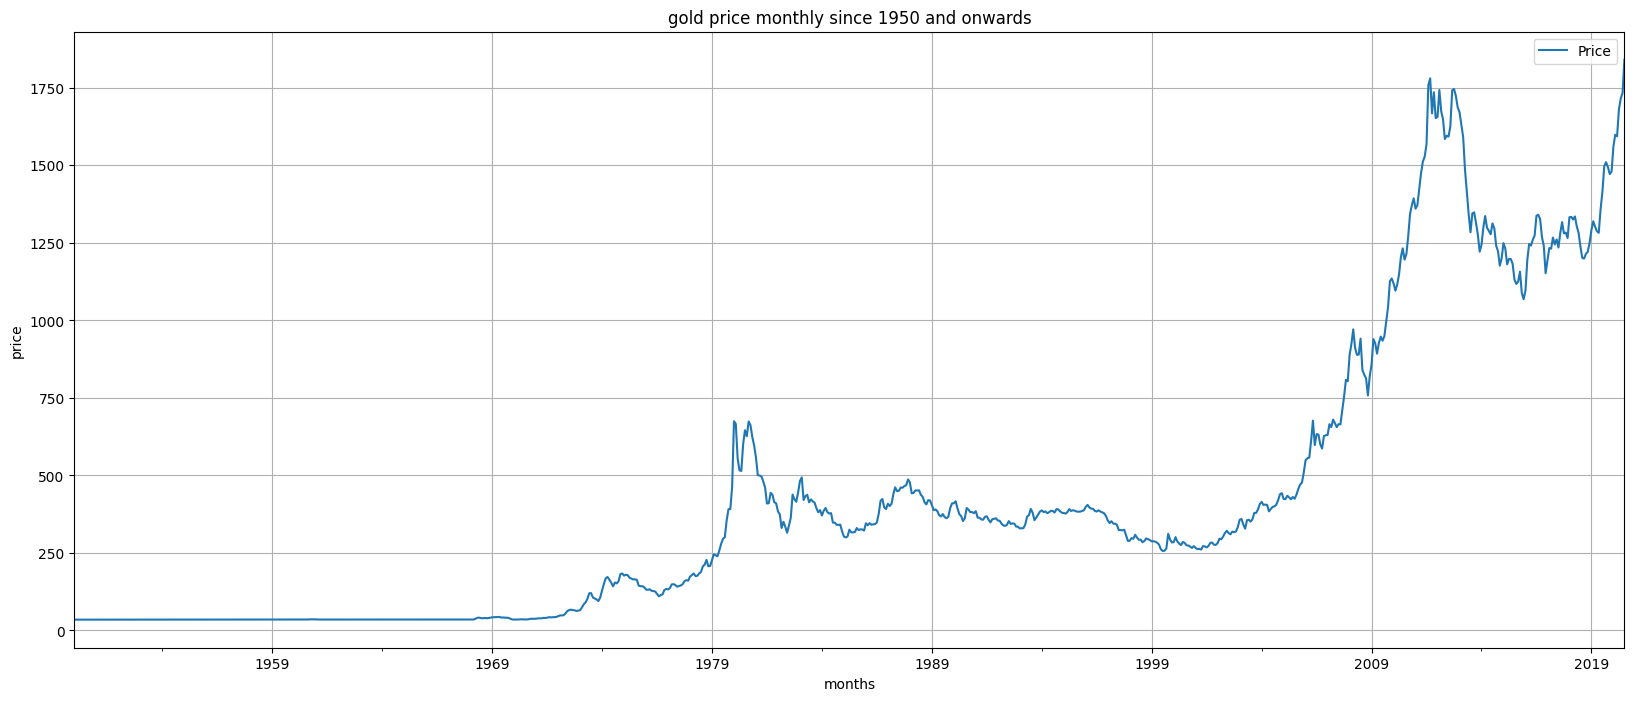

In [108]:
df.plot(figsize=(20,8))
plt.title("gold price monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()


In [109]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


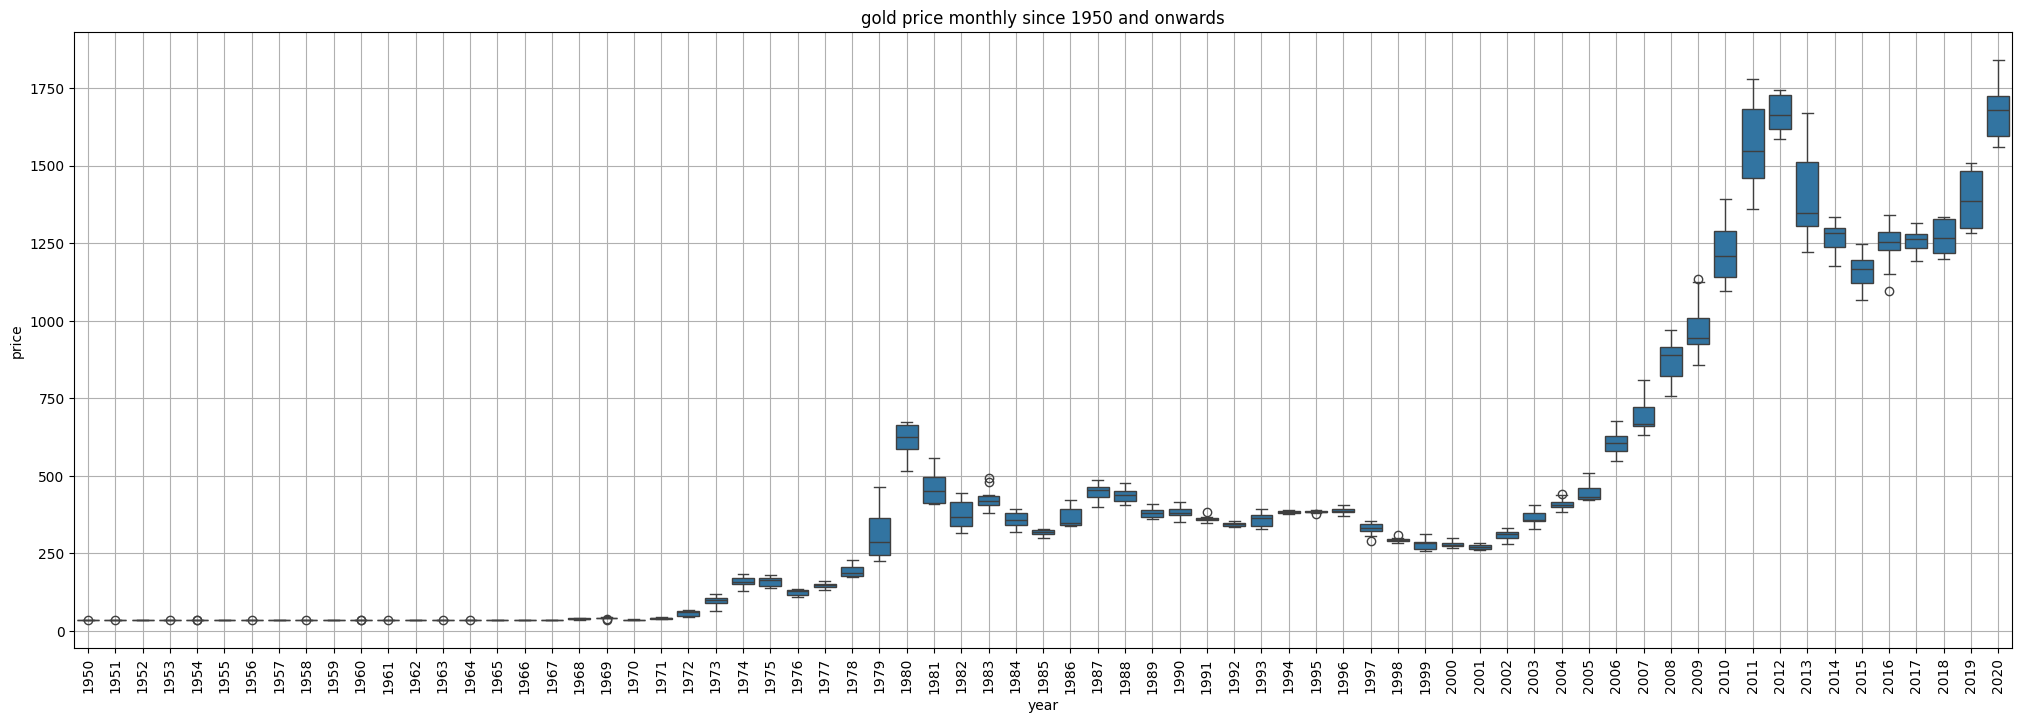

In [110]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title("gold price monthly since 1950 and onwards")
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.grid()





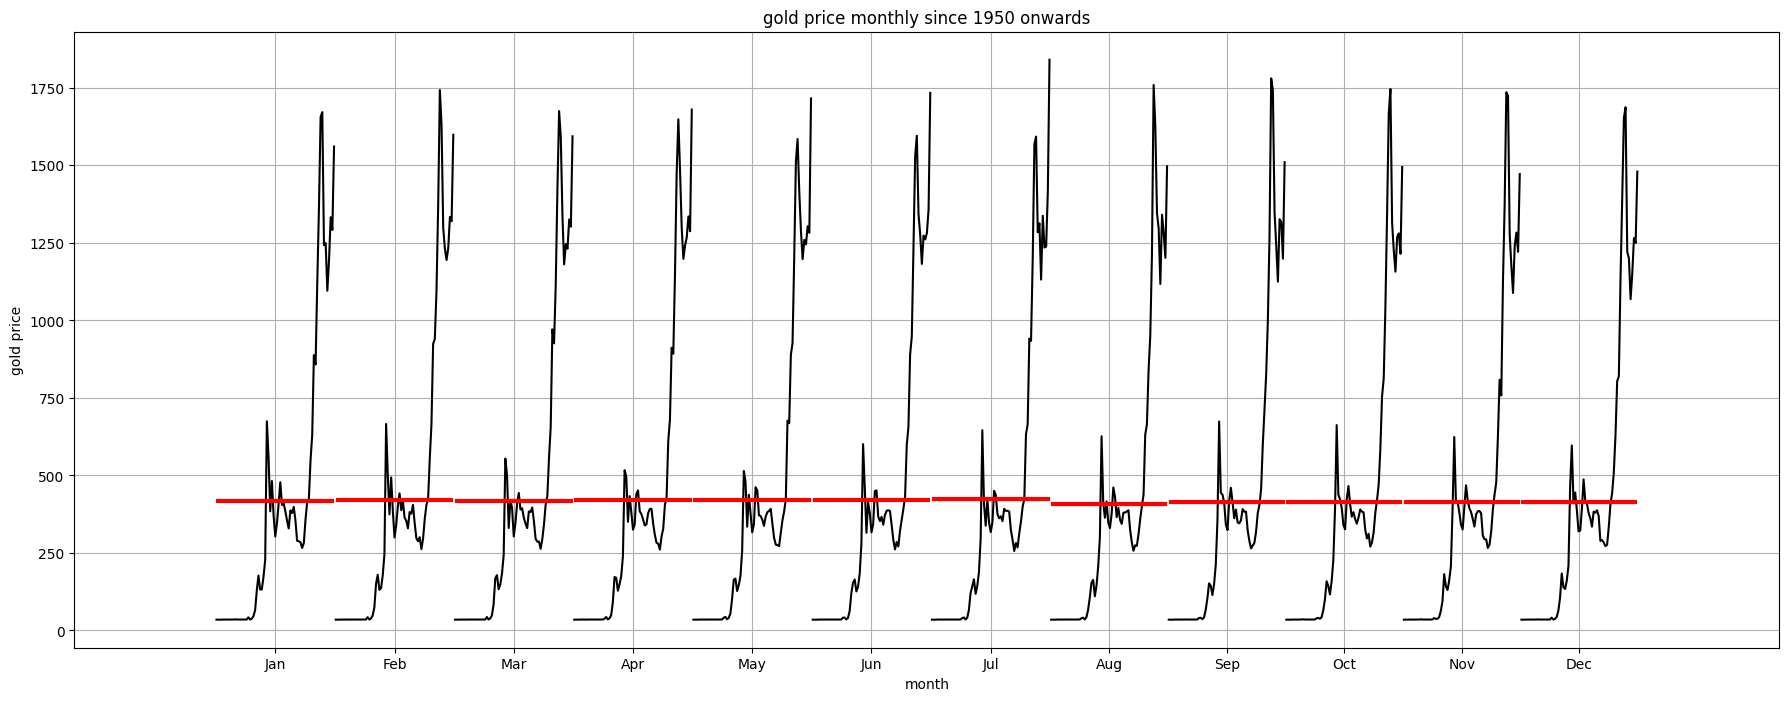

In [111]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(22,8))
month_plot(df,ylabel="gold price",ax=ax)
plt.title("gold price monthly since 1950 onwards")
plt.xlabel("month")
plt.grid()

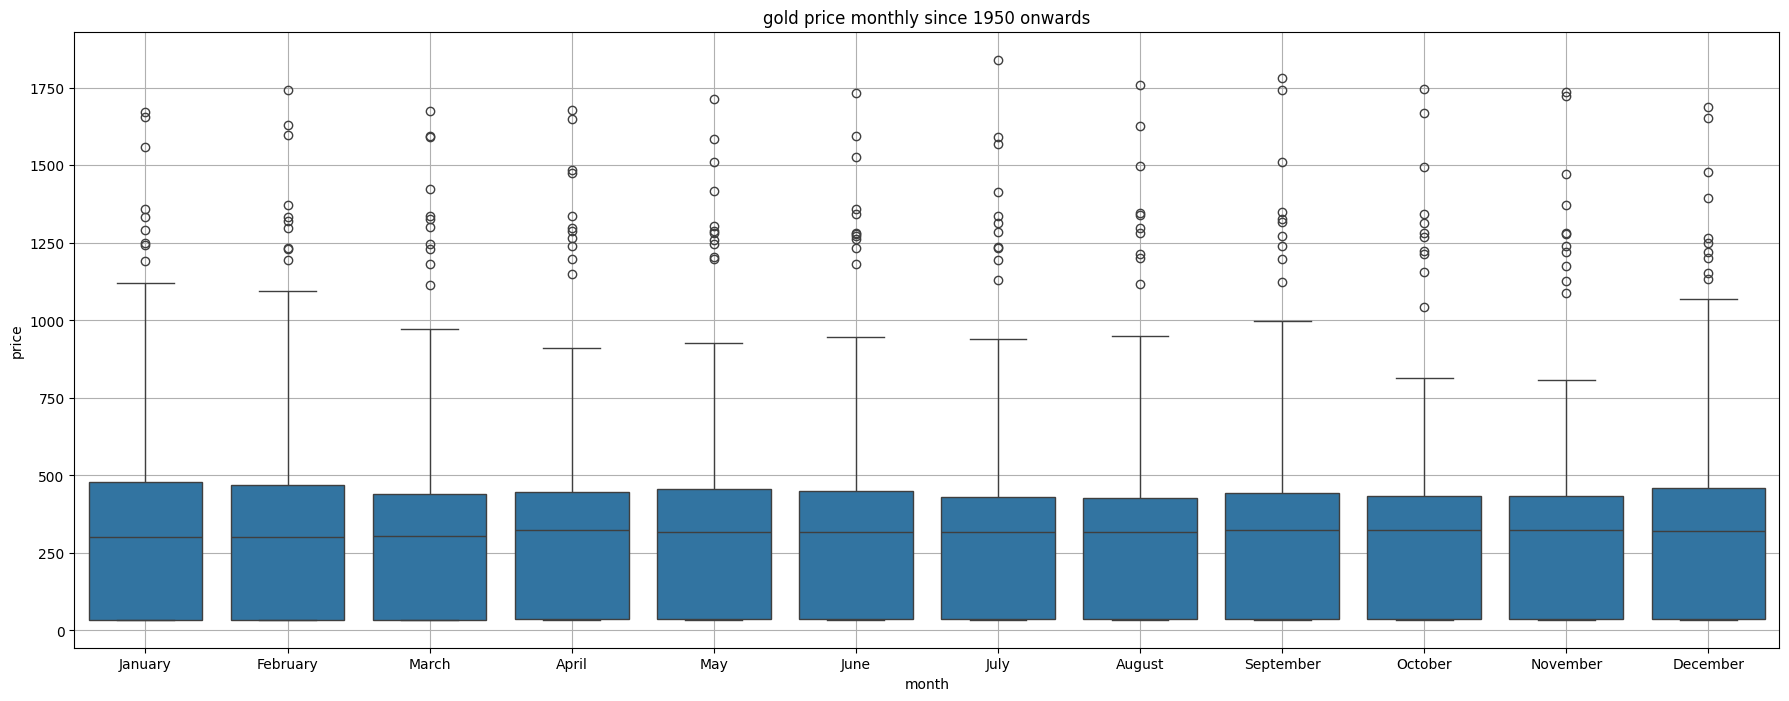

In [112]:
_,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title("gold price monthly since 1950 onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.grid()

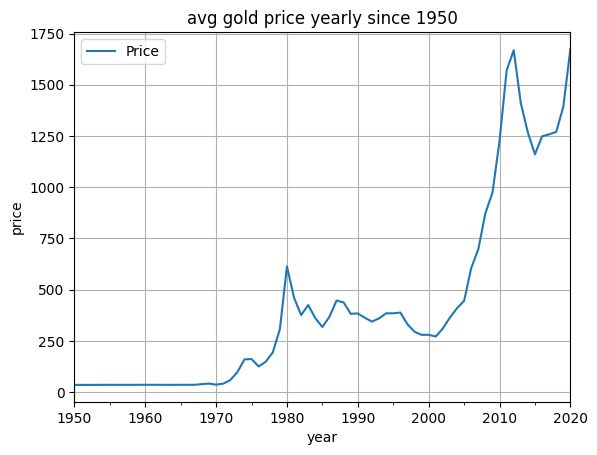

In [113]:
df_yearly_sum=df.resample("A").mean()
df_yearly_sum.plot()
plt.title("avg gold price yearly since 1950")
plt.ylabel("price")
plt.xlabel("year")
plt.grid()


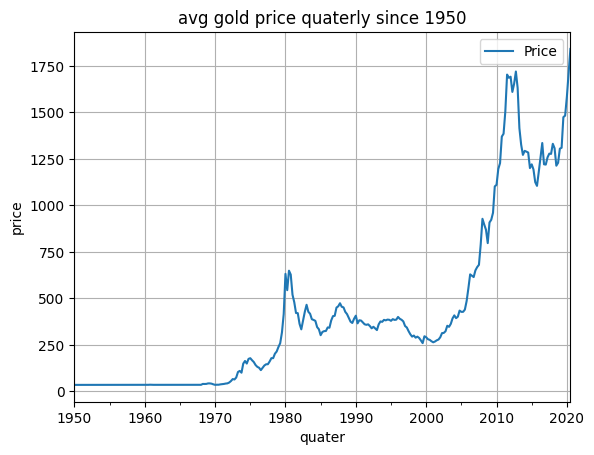

In [114]:
df_quaterly_sum=df.resample("Q").mean()
df_quaterly_sum.plot()
plt.title("avg gold price quaterly since 1950")
plt.ylabel("price")
plt.xlabel("quater")
plt.grid()


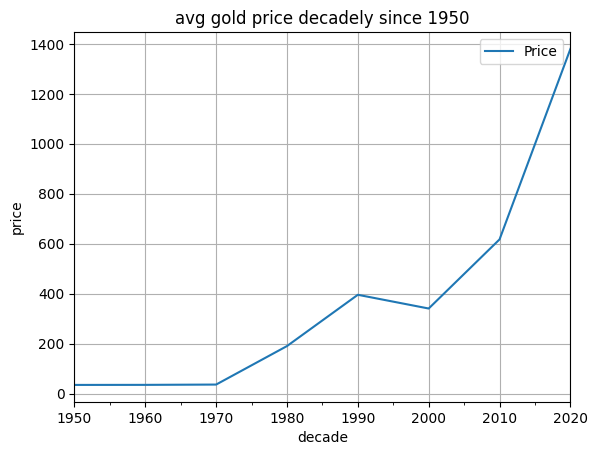

In [115]:
df_decade_sum=df.resample("10Y").mean()
df_decade_sum.plot()
plt.title("avg gold price decadely since 1950")
plt.ylabel("price")
plt.xlabel("decade")
plt.grid()

In [116]:
df_1=df.groupby(df.index.year).mean().rename(columns={"Price":"Mean"})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={"Price":"Std"}),left_index=True,right_index=True)
df_1["cov_pct"]=((df_1["Std"]/df_1["Mean"])*100).round(2)
df_1.head()


,Mean,Std,cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


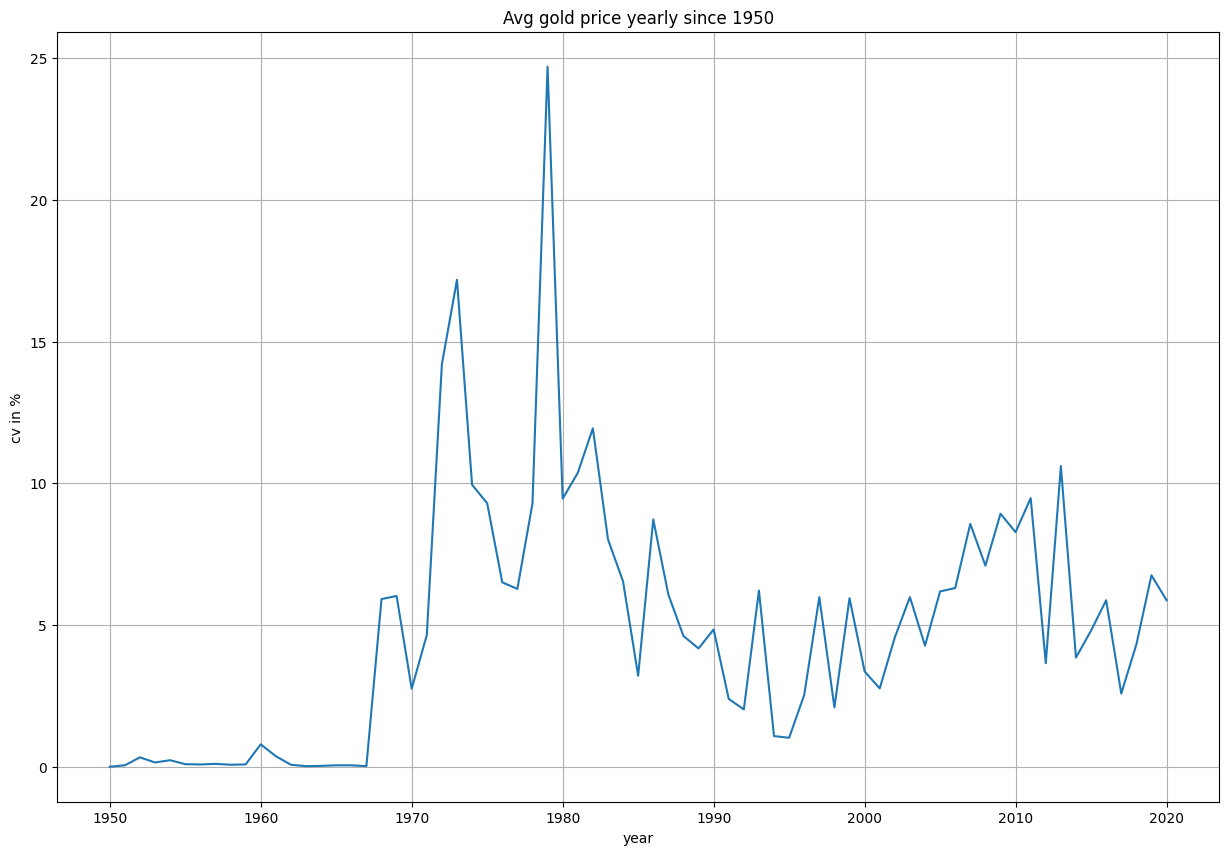

In [117]:
fig,ax=plt.subplots(figsize=(15,10))
df_1["cov_pct"].plot()
plt.title("Avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel("cv in %")
plt.grid()
plt.show()

In [118]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]

In [119]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


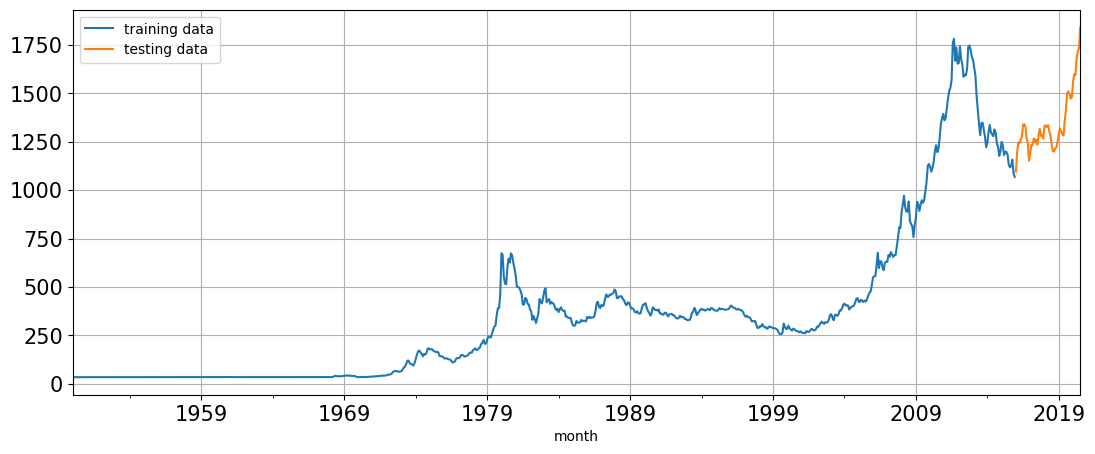

In [120]:
train["Price"].plot(figsize=(13,5),fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(["training data","testing data"])
plt.show()


In [121]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [122]:
LR_train=train.copy()
LR_test=test.copy()
LR_train.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [123]:
LR_train["time"]=train_time
LR_test["time"]=test_time

In [124]:
LR_model=LinearRegression()

LR_model.fit(LR_train[["time"]],LR_train["Price"].values)


LinearRegression()

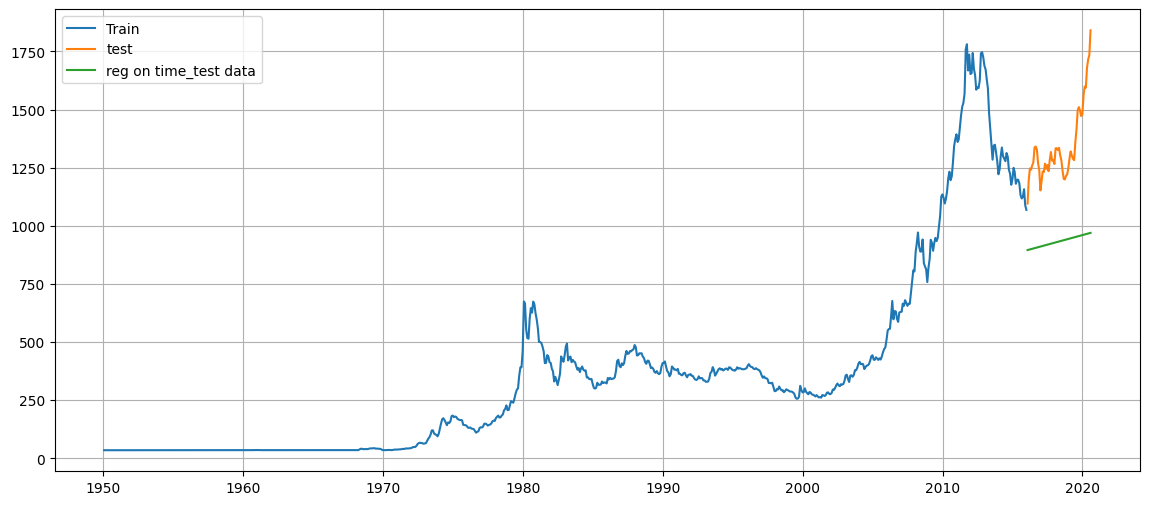

In [125]:
test_prediction=LR_model.predict(LR_test[["time"]])
LR_test["Forecast"]=test_prediction

plt.figure(figsize=(14,6))
plt.plot(train["Price"],label="Train")
plt.plot(test["Price"],label="test")
plt.plot(LR_test["Forecast"],label="reg on time_test data")
plt.legend(loc="best")
plt.grid()


In [126]:
def mape(actual,predicted):
    return round(np.mean(abs(actual-predicted)/actual)*100,2)

mape_model_test=mape(test["Price"].values,test_prediction)
print(f"MAPE is %3.3f"%(mape_model_test),"%")

MAPE is 29.760 %


In [127]:
results=pd.DataFrame({"Test Mape(%)":[mape_model_test]},index=["RegressionOnTime"])
results

,Test Mape(%)
RegressionOnTime,29.76
